In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [5]:
X,y=make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
def create_dropout_model(dropout_rate=0.2):
    model=Sequential([
        Dense(64,input_shape=(X_train.shape[1],),activation='relu'),
        Dropout(dropout_rate),
        Dense(32,activation='relu'),
        Dropout(dropout_rate),
        Dense(1,activation='sigmoid')
        
    ])
    return model


In [9]:
dropout_model=create_dropout_model(dropout_rate=0.2)
dropout_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

dropout_history=dropout_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5950 - loss: 0.6651 - val_accuracy: 0.7150 - val_loss: 0.6007
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7425 - loss: 0.5262 - val_accuracy: 0.7500 - val_loss: 0.4982
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8175 - loss: 0.4374 - val_accuracy: 0.8250 - val_loss: 0.4360
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8313 - loss: 0.3964 - val_accuracy: 0.8350 - val_loss: 0.4017
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8575 - loss: 0.3596 - val_accuracy: 0.8500 - val_loss: 0.3915
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.3435 - val_accuracy: 0.8550 - val_loss: 0.3737
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3300 - val_accuracy: 0.8650 - val_loss: 0.3727
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3215 - val_accuracy: 0.8650 - val_loss:

In [17]:
def create_gradient_clip_model(clip_norm=1.0):
    model=Sequential([
        Dense(64,input_shape=(X_train.shape[1],),activation='relu'),
        Dense(32,activation='relu'),
        Dense(1,activation='sigmoid')
    ])
    optimizer=Adam(clipnorm=clip_norm)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [23]:
gradient_clip_model=create_gradient_clip_model(clip_norm=0.1)
gradient_clip_history=gradient_clip_model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6388 - loss: 0.6569 - val_accuracy: 0.8000 - val_loss: 0.5557
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss: 0.4675 - val_accuracy: 0.8350 - val_loss: 0.4405
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8700 - loss: 0.3677 - val_accuracy: 0.8550 - val_loss: 0.3889
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8863 - loss: 0.3229 - val_accuracy: 0.8700 - val_loss: 0.3693
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.3038 - val_accuracy: 0.8750 - val_loss: 0.3598
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8913 - loss: 0.2907 - val_accuracy: 0.8700 - val_loss: 0.3583
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8900 - loss: 0.2805 - val_accuracy: 0.8750 - val_loss: 0.3578
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8938 - loss: 0.2719 - val_accuracy: 0.8700 - val_loss:

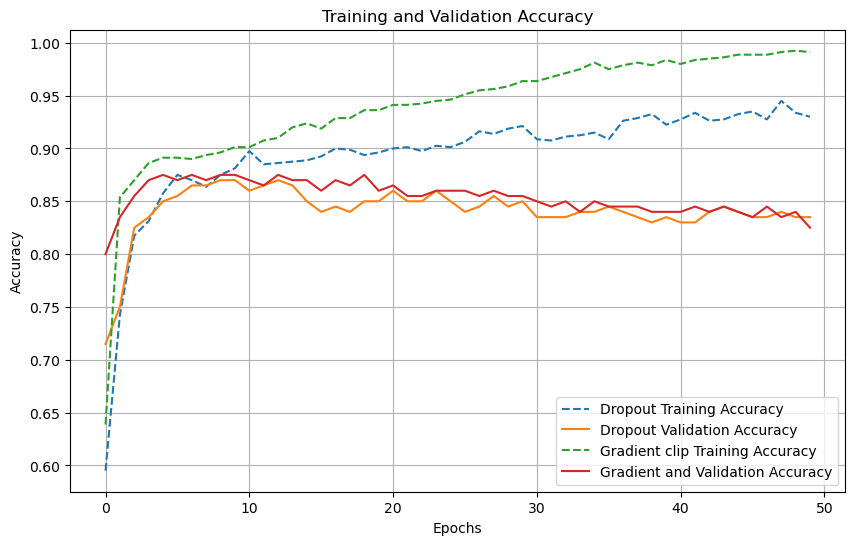

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(dropout_history.history['accuracy'],label='Dropout Training Accuracy',linestyle='--')
plt.plot(dropout_history.history['val_accuracy'],label='Dropout Validation Accuracy')
plt.plot(gradient_clip_history.history['accuracy'],label='Gradient clip Training Accuracy',linestyle='--')
plt.plot(gradient_clip_history.history['val_accuracy'],label='Gradient and Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
mnist=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train_parity=np.arary([np.sum(np.array(list(map(int,str(y)))))%2 for y in y_train])
y_train_parity=np.array([np.sum(np.array(list(map(int,str(y)))))%2 for y in y_test])